1)Scipy - обрезка изображения

In [1]:
import scipy
import requests
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

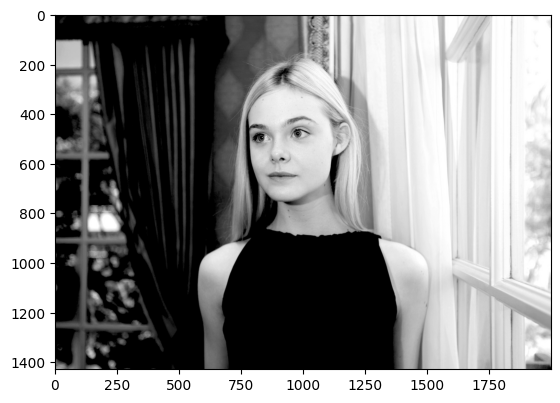

In [2]:
img_url="https://w.forfun.com/fetch/4e/4eeb591c201130ab8ca9b89839921517.jpeg"
r = requests.get(img_url, allow_redirects=True)
imgname="img1.jpg"
open(imgname, 'wb').write(r.content)
img = mpimg.imread(imgname)
plt.imshow(img)
plt.show()

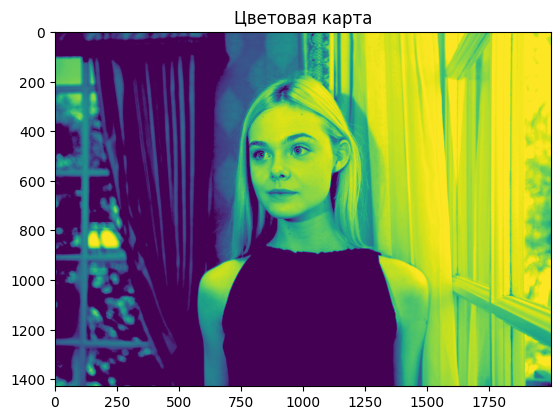

In [3]:
plt.imshow(img[:, :, 0])
plt.title('Цветовая карта')
plt.show()

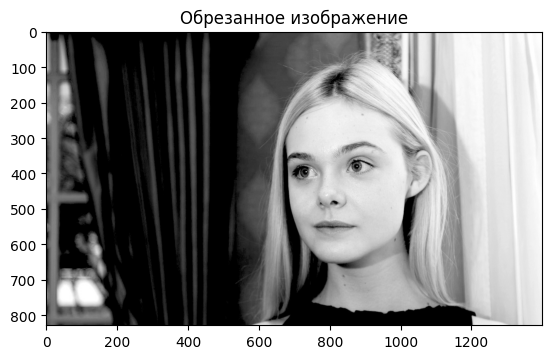

In [4]:
import numpy as np
from PIL import Image
img = np.array(Image.open(imgname))
crop_face = img[100:-500, 100:-500]
plt.title('Обрезанное изображение')
plt.imshow(crop_face) 
plt.show()

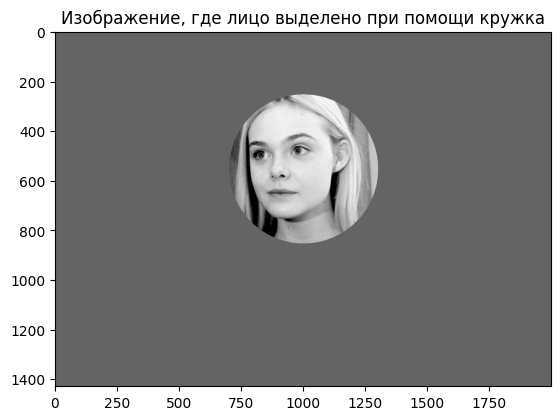

In [5]:
import numpy as np
from PIL import Image
img = np.array(Image.open(imgname))
sy, sx, sz = img.shape
y, x = np.ogrid[0:sy, 0:sx] # x и y обозначают пиксели
y.shape, x.shape
a=300; b=300

centerx, centery = (sx/2, sy/2) # центр изображения
mask = ((((y - centery+160)**2)/b**2) + (((x - centerx)**2)/a**2)) > 1 # круг
img[mask] = 100
plt.title('Изображение, где лицо выделено при помощи кружка')
plt.imshow(img) 
plt.show()

2)Работа со статистикой

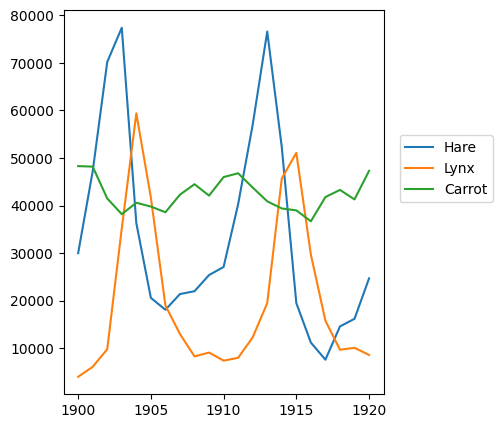

In [6]:
data = np.loadtxt('populations.txt')
year, hares, lynxes, carrots = data.T  # колонки в переменные

import matplotlib.pyplot as plt
plt.axes([0.2, 0.1, 0.5, 0.8]) 

plt.plot(year, hares, year, lynxes, year, carrots) 

plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5)) 

In [7]:
import requests
target_url = 'https://scipy-lectures.org/_downloads/populations.txt'
response = requests.get(target_url)
text_data = response.text
filename = 'populations.txt'
with open(filename, 'w') as file:
    file.write(text_data)

In [8]:
data = np.loadtxt(filename, skiprows=1)
year, hares, lynxes, carrots = data.T  

In [9]:
populations = data[:,1:]
headers = ['Hares', 'Lynxes', 'Carrots']
mean = populations.mean(axis=0)

print("Среднее:", np.stack((headers, mean), axis=1))

std = populations.std(axis=0)
print("Стандартная девиация:", np.stack((headers, std), axis=1))

max_years = np.argmax(populations, axis=0)
print("В каком году популяция каждого вида была наибольшей:", year[max_years])

max_species = np.argmax(populations, axis=1)
species = np.array(['hare', 'lynx', 'carrot'])

print("Какой вид имеет наибольшую популяцию за каждый год:", np.stack((year, species[max_species]), axis=1))

above_level_species = np.any(populations > 50000, axis=1)
print("В какие годы любая из популяций превышает 50000:", year[above_level_species])

top2 = np.argsort(populations, axis=0)[:2]
print("Топ 2 года для каждого вида, когда его популяции были самыми низкими:", year[top2])

hare_grade = np.gradient(hares, 1.0)
lynx_grade = np.gradient(lynxes, 1.0)
print("Изменение численности зайцев", hare_grade)
print("Изменение численности рысей", lynx_grade)
print("Корреляция:", np.corrcoef(hare_grade, lynx_grade)[0, 1])

Среднее: [['Hares' '34080.95238095238']
 ['Lynxes' '20166.666666666668']
 ['Carrots' '42400.0']]
Стандартная девиация: [['Hares' '20897.906458089667']
 ['Lynxes' '16254.591536908763']
 ['Carrots' '3322.5062255844787']]
В каком году популяция каждого вида была наибольшей: [1903. 1904. 1900.]
Какой вид имеет наибольшую популяцию за каждый год: [['1900.0' 'carrot']
 ['1901.0' 'carrot']
 ['1902.0' 'hare']
 ['1903.0' 'hare']
 ['1904.0' 'lynx']
 ['1905.0' 'lynx']
 ['1906.0' 'carrot']
 ['1907.0' 'carrot']
 ['1908.0' 'carrot']
 ['1909.0' 'carrot']
 ['1910.0' 'carrot']
 ['1911.0' 'carrot']
 ['1912.0' 'hare']
 ['1913.0' 'hare']
 ['1914.0' 'hare']
 ['1915.0' 'lynx']
 ['1916.0' 'carrot']
 ['1917.0' 'carrot']
 ['1918.0' 'carrot']
 ['1919.0' 'carrot']
 ['1920.0' 'carrot']]
В какие годы любая из популяций превышает 50000: [1902. 1903. 1904. 1912. 1913. 1914. 1915.]
Топ 2 года для каждого вида, когда его популяции были самыми низкими: [[1917. 1900. 1916.]
 [1916. 1901. 1903.]]
Изменение численности за

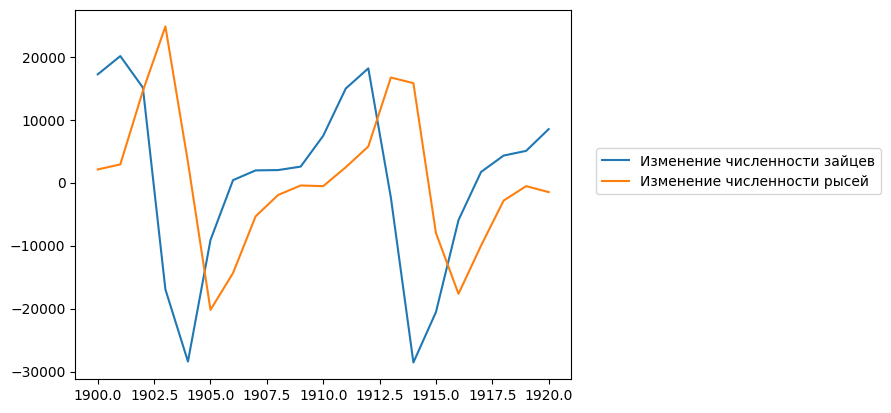

In [10]:
plt.plot(year, hare_grade, year, lynx_grade) 
plt.legend(('Изменение численности зайцев', 'Изменение численности рысей'), loc=(1.05, 0.5))
plt.show()

3)Множество Мандельброта

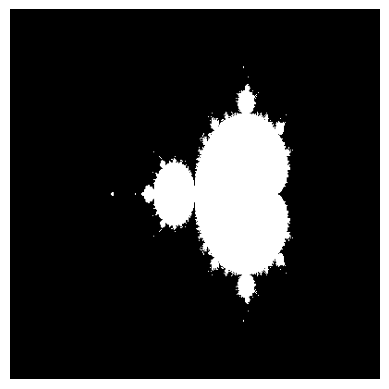

In [15]:
import numpy as np
import matplotlib.pyplot as plt

pmin, pmax, qmin, qmax = -3, 1.5, -1.5, 1.5
ypoints, xpoints = 400, 400
max_i = 50
inf_bolder = 100
image = np.zeros((ypoints,xpoints))

for ip, p in enumerate(np.linspace(pmin, pmax, ypoints)):
    for iq, q in enumerate(np.linspace(qmin, qmax, xpoints)):
        c = p + 1j * q
        z = 0
        for k in range(max_i):
            z = z ** 2 + c
            if abs(z) > inf_bolder:
                image[ip, iq] = 1
                break


plt.axis('off')
plt.imshow(image.T, cmap='Greys')
plt.show()